In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# 获取当前工作目录
current_dir = os.getcwd()
print(f"当前工作目录: {current_dir}")

# 列出当前目录下的所有文件
files = os.listdir(current_dir)
print("当前目录下的文件:")
for file in files:
    print(file)




当前工作目录: /root/Download/Modis-algae-aliyun/aie-taihu
当前目录下的文件:
特征和密度结果_MODIS_MOD09GA_061_20241029_插值填充.csv
03-inversion-taihu-1021-density-moremoremoredays-LSTM.ipynb
05-merge-mod-mcd-RF.ipynb
03-LSTM-1024-predict.ipynb
02-inversion-taihu-1016-density-runone.ipynb
05-merge-mod-mcd-tcn-basic.ipynb
01-test-taihu.ipynb
01-test-taihu-1016-chla.ipynb
特征和密度结果_MODIS_MOD09GA_061_20241106_tuoshan.csv
03-inversion-taihu-1019-density-moredays-RF .ipynb
00-tuoshan.csv
特征和密度结果_MODIS_MCD18C2_061_20241027_插值填充.csv
04-LSTM-lanzhanzui++1025-predict.ipynb
05-merge-mod-mcd-tcn-basic-better.ipynb
06-merge-mod-mcd-tcn-basic-1031-keyfeature-02LSTM.ipynb
07-LSTM-tuoshan+MOD09GA+1106-relation-density.ipynb
03-inversion-taihu-1019-density-moremoredays-RF.ipynb
00-lanshanzui.csv
03-LSTM-1024-read-train.ipynb
07-LSTM-tuoshan+MCD18C2+1102-read.ipynb
07-LSTM-lanshanzui+MCD18C2+1027-read.ipynb
progress.pkl
04-LSTM-lanzhanzui++1025-read-train.ipynb
02-inversion-taihu-1016-density-runall-78.ipynb
特征和密度结果_MODIS_MCD18C2

In [3]:
# # 读取原始数据文件
# df = pd.read_csv('特征和密度结果_MODIS_MOD09GA_061_20241106_插值填充_tuoshan.csv')

# # 将日期列转换为datetime格式
# df['date'] = pd.to_datetime(df['date'])

# # 创建完整的日期范围
# full_date_range = pd.date_range(start=df['date'].min(), end=df['date'].max())

# # 将现有数据转换为以日期为索引的DataFrame
# df_indexed = df.set_index('date')

# # 重新索引到完整的日期范围，这将自动为缺失的日期创建NaN值
# df_reindexed = df_indexed.reindex(full_date_range)

# # 对所有列进行线性插值
# interpolated_df = df_reindexed.interpolate(method='linear')

# # 重置索引，使日期成为一个列
# interpolated_df = interpolated_df.reset_index()
# interpolated_df = interpolated_df.rename(columns={'index': 'date'})

# # 保存插值后的结果到新的CSV文件
# interpolated_filename = '特征和密度结果_MODIS_MOD09GA_061_20241106_插值填充_tuoshan2.csv'
# interpolated_df.to_csv(interpolated_filename, index=False)

# # 输出插值填充后的数据信息
# print(f"\n插值填充后的数据行数: {len(interpolated_df)}")
# print(f"插值填充前的数据行数: {len(df)}")
# print(f"填充的行数: {len(interpolated_df) - len(df)}")



插值填充后的数据行数: 1246
插值填充前的数据行数: 865
填充的行数: 381


In [2]:

# 尝试读取CSV文件
try:
    df = pd.read_csv('特征和密度结果_MODIS_MOD09GA_061_20241106_插值填充_tuoshan.csv')
    print("成功读取CSV文件")
except FileNotFoundError:
    print("未找到CSV文件，请检查文件名和路径是否正确")
    raise

成功读取CSV文件


In [4]:
import numpy as np
# 定义异常值检测规则
anomaly_rules = {
    'evi': {'condition': lambda x: x < -1, 'name': 'EVI'},
    'ndvi': {'condition': lambda x: x < -1, 'name': 'NDVI'}, 
    'ndci': {'condition': lambda x: x > 1, 'name': 'NDCI'},
    'nrfi': {'condition': lambda x: x < -1, 'name': 'NRFI'}
}

# 遍历每个指标进行异常值检测和处理
for index, rule in anomaly_rules.items():
    # 找出异常值日期
    anomaly_mask = rule['condition'](df[index])
    anomaly_dates = df[anomaly_mask]['date']
    print(f"发现{len(anomaly_dates)}个{rule['name']}异常值日期")
    
    # 将异常日期对应的所有特征值设置为NaN
    df.loc[df['date'].isin(anomaly_dates), df.columns != 'date'] = np.nan

# 对所有特征进行插值填充
df = df.interpolate(method='linear')

print("异常值处理和插值填充完成")


发现0个EVI异常值日期
发现0个NDVI异常值日期
发现0个NDCI异常值日期
发现0个NRFI异常值日期
异常值处理和插值填充完成


/tmp/ipykernel_13244/133608023.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_13244/133608023.py:23: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_13244/133608023.py:23: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_13244/133608023.py:23: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_13244/133608023.py:23: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_13244/133608023.py:23: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOG

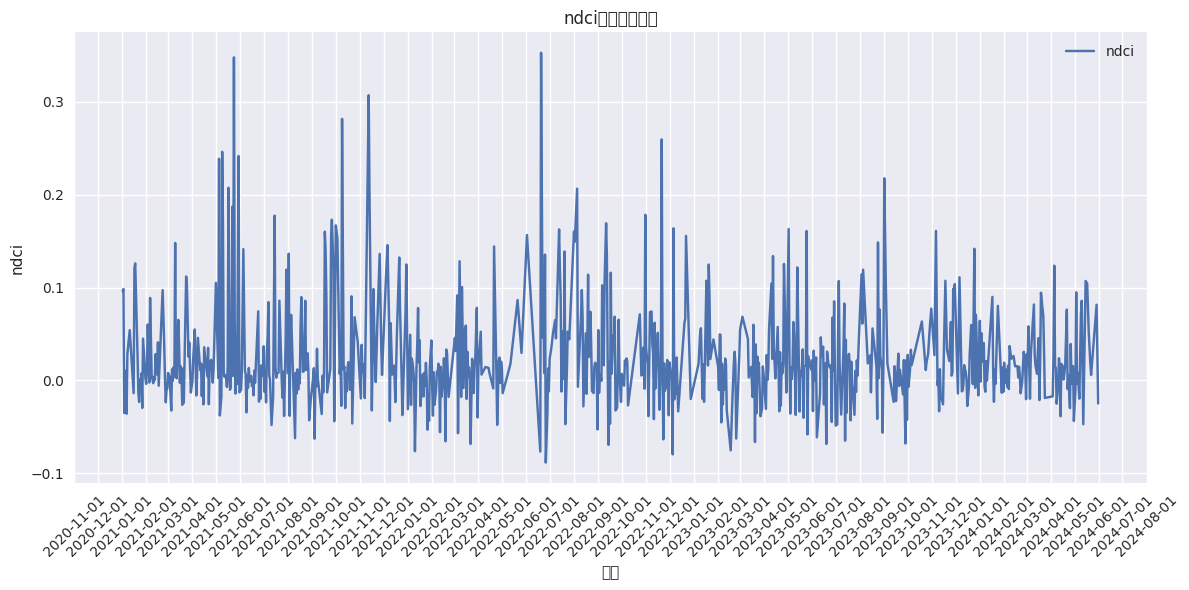

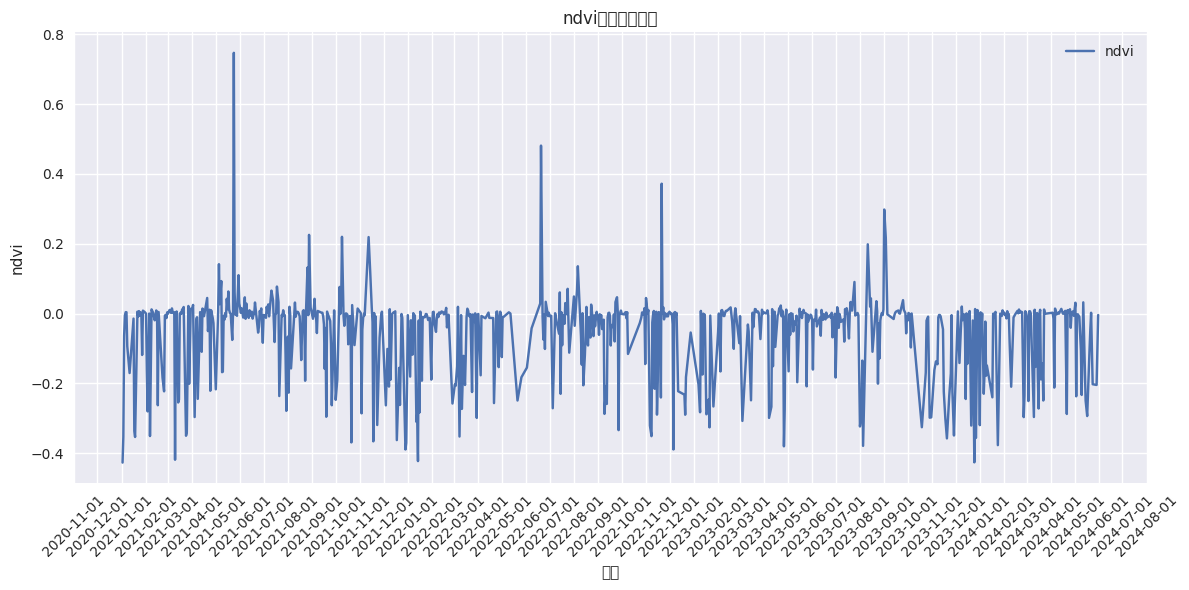

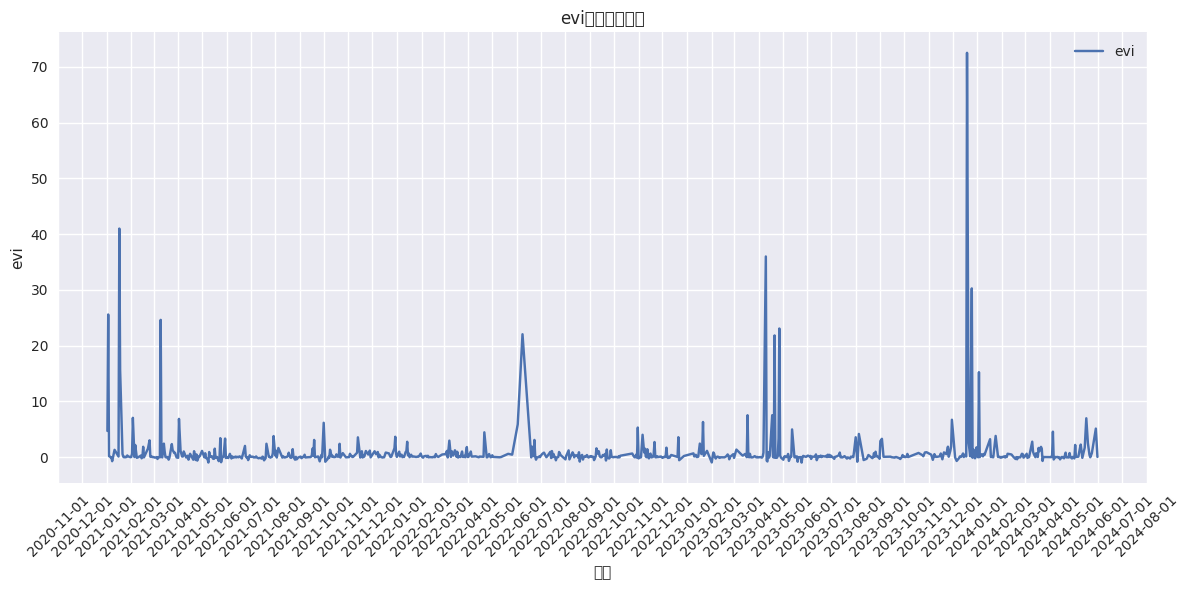

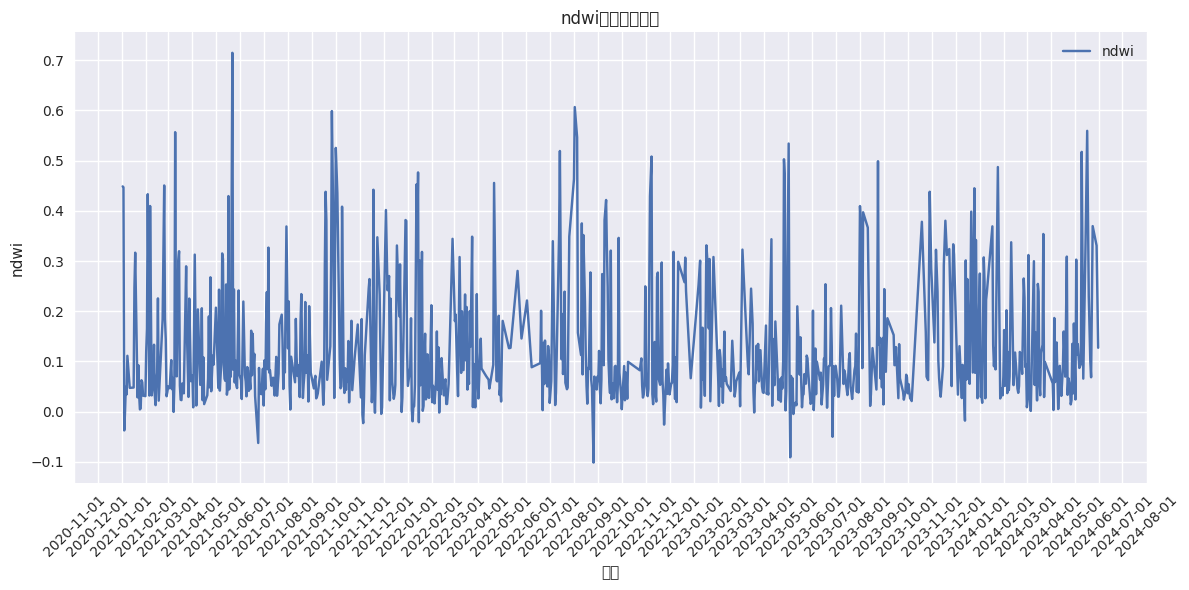

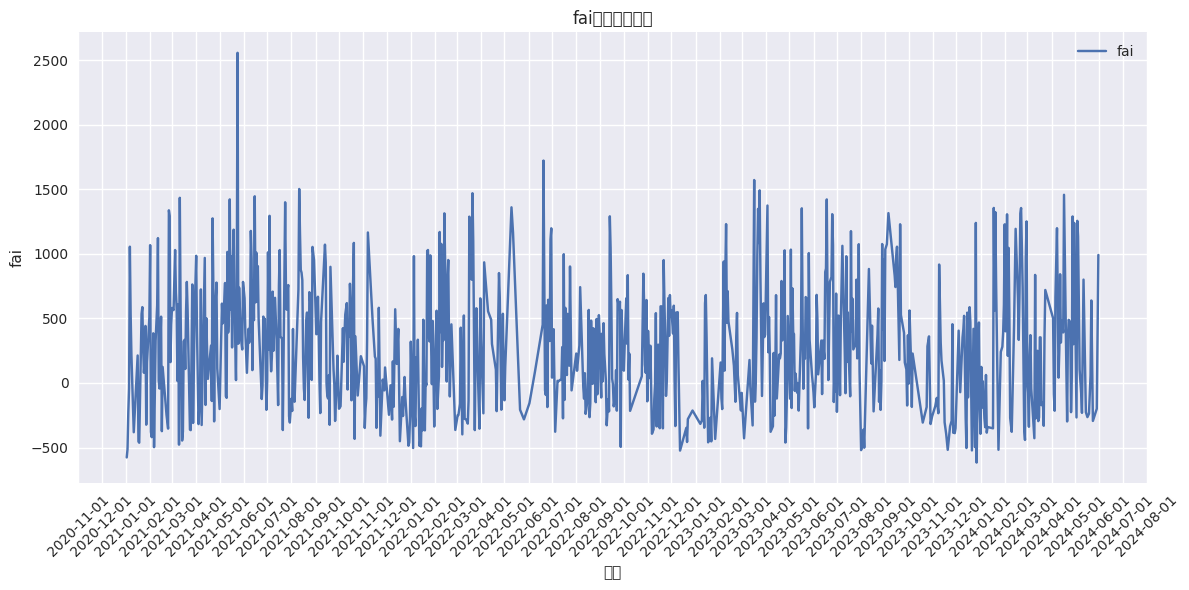

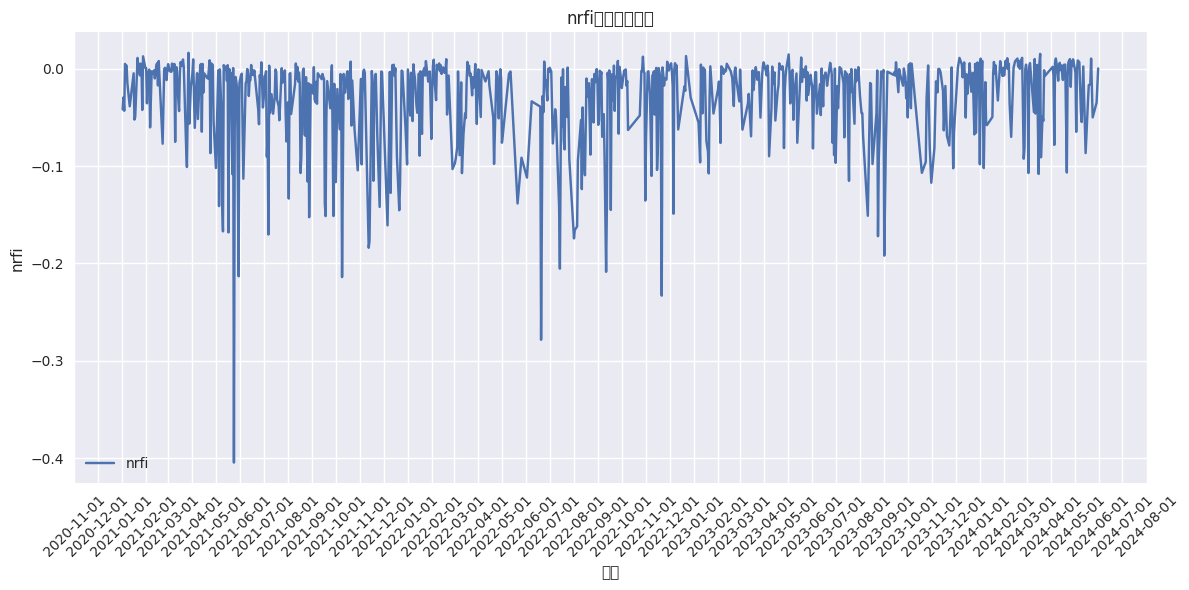

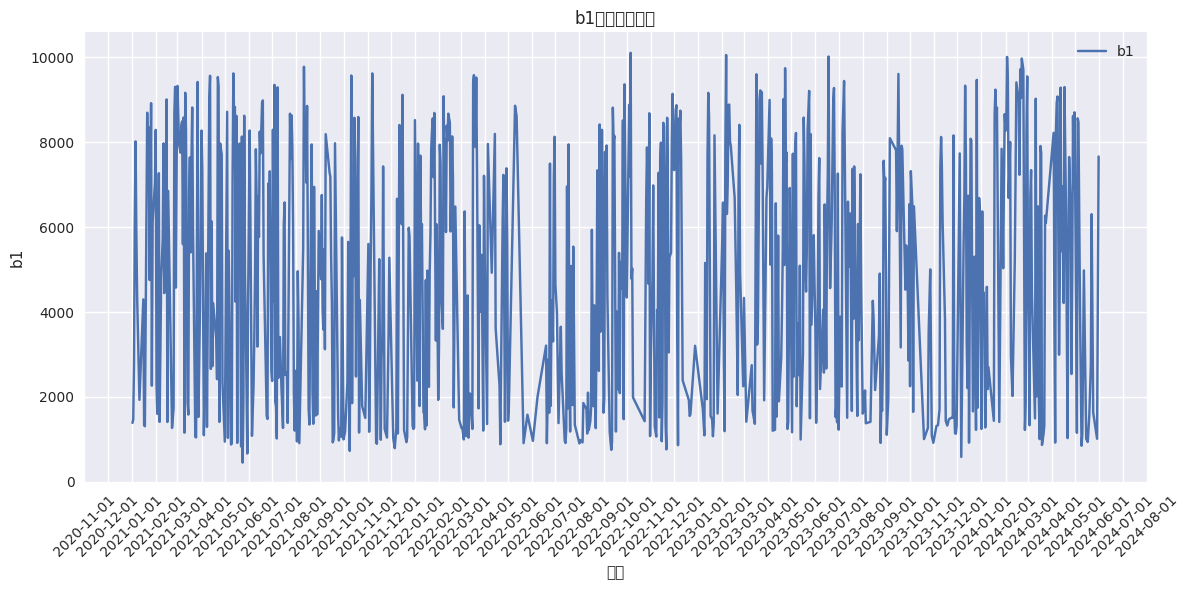

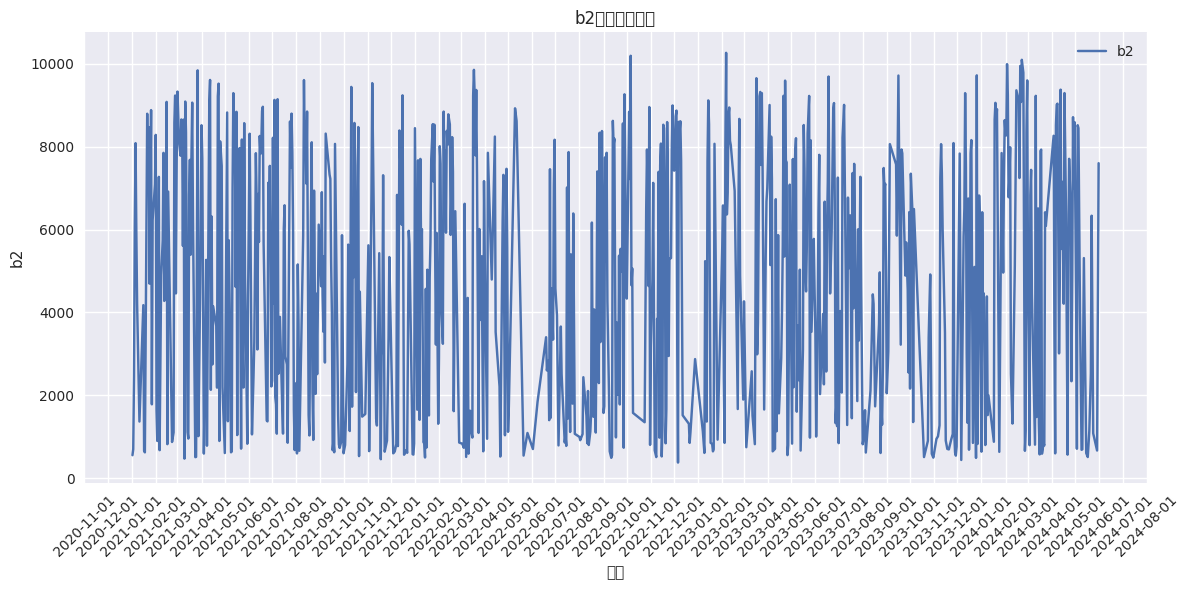

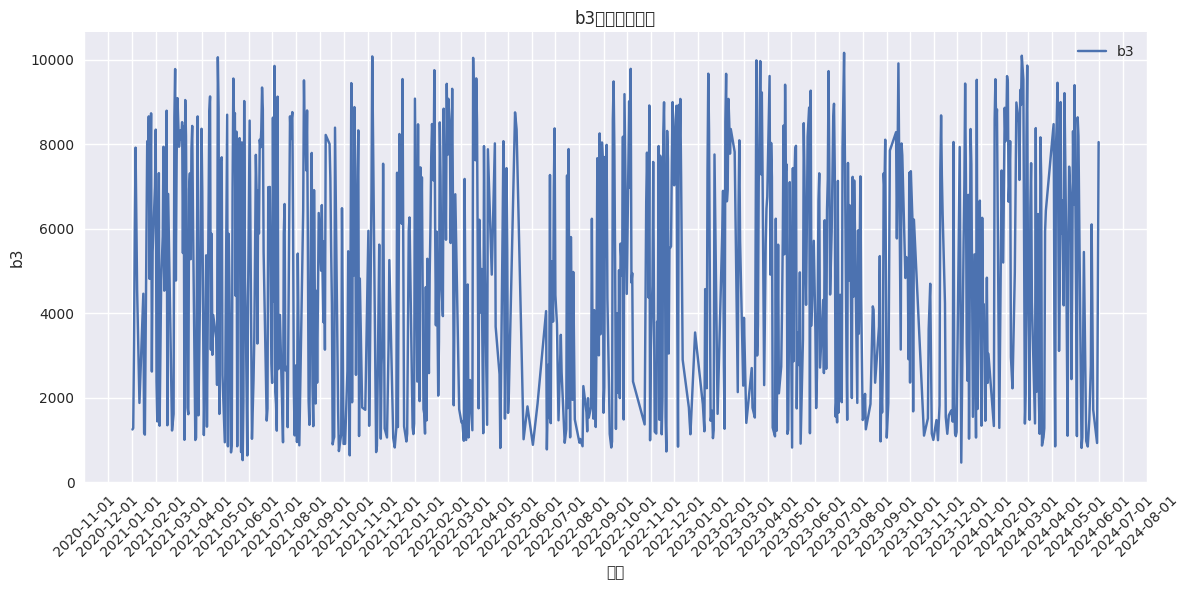

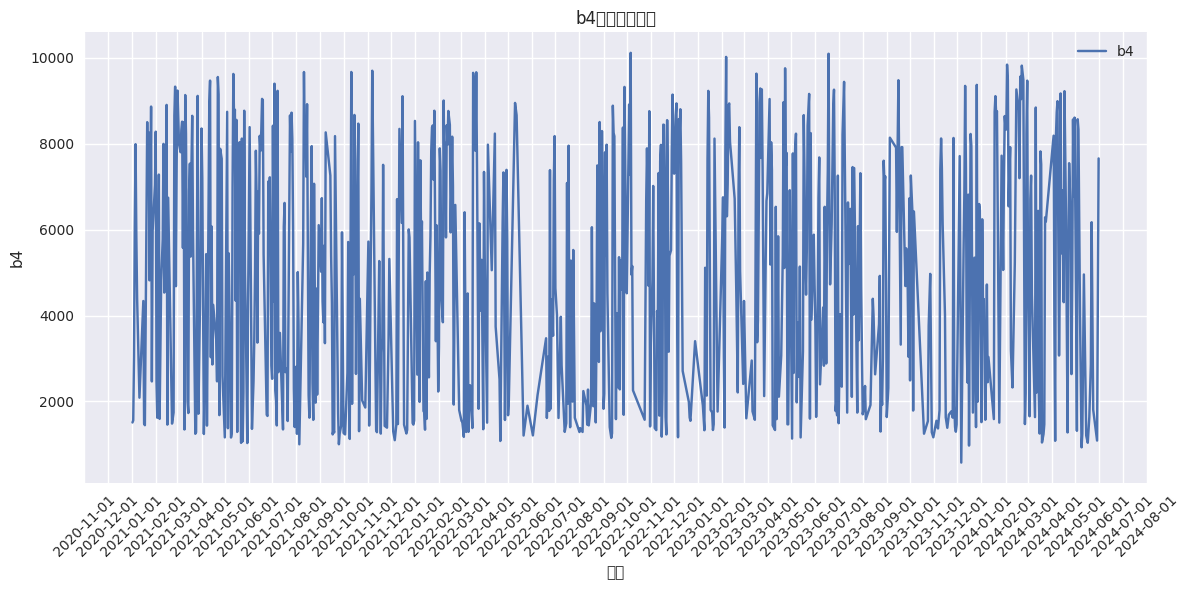

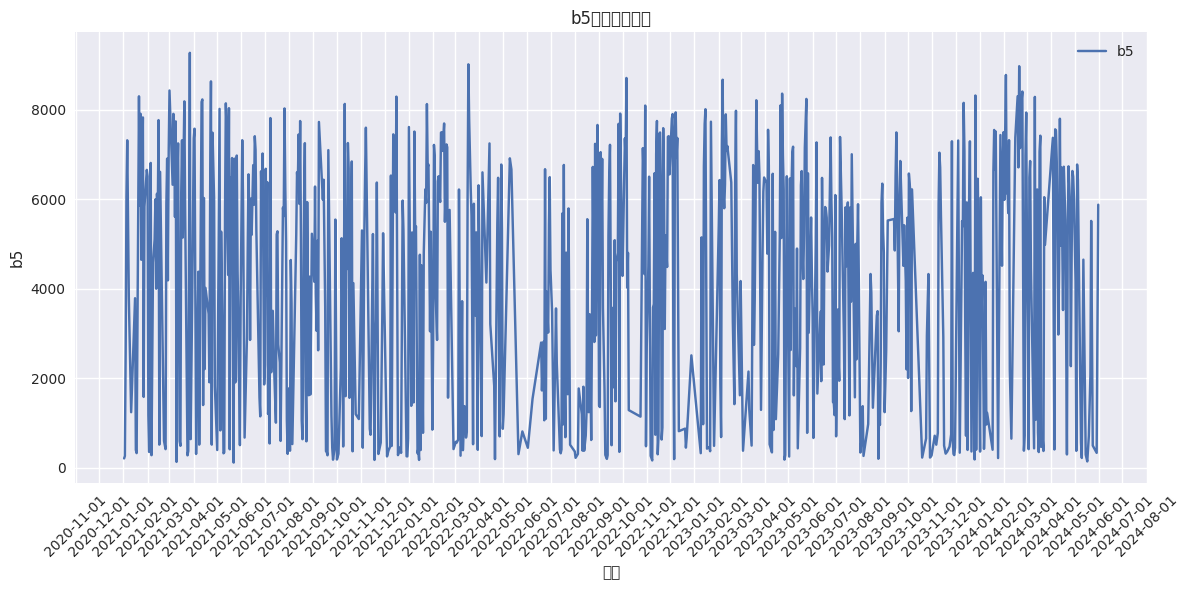

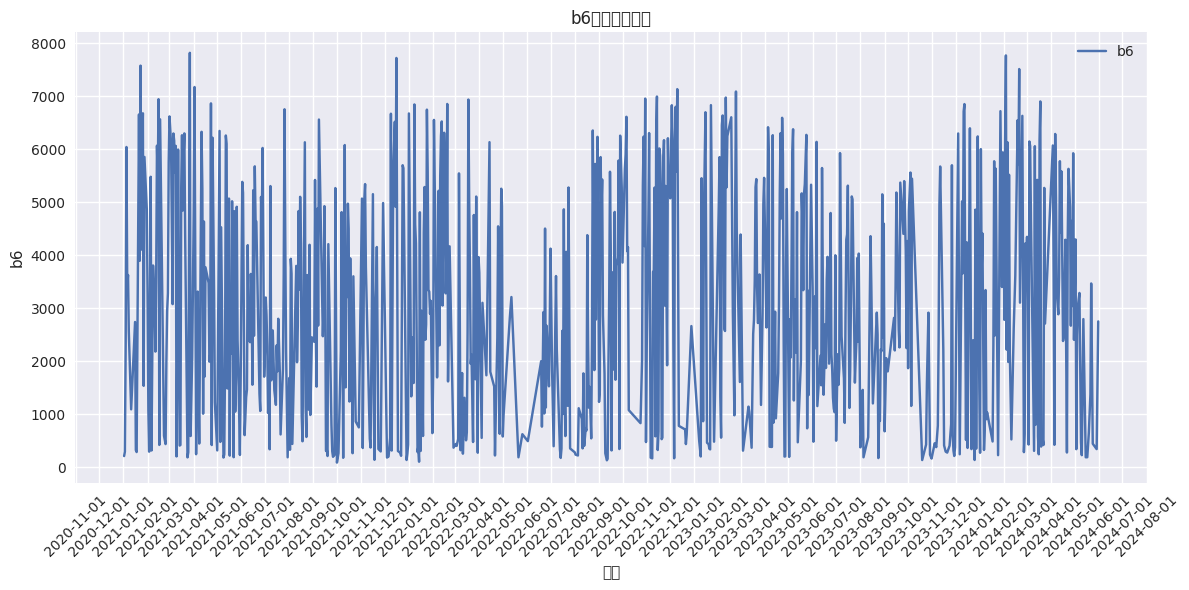

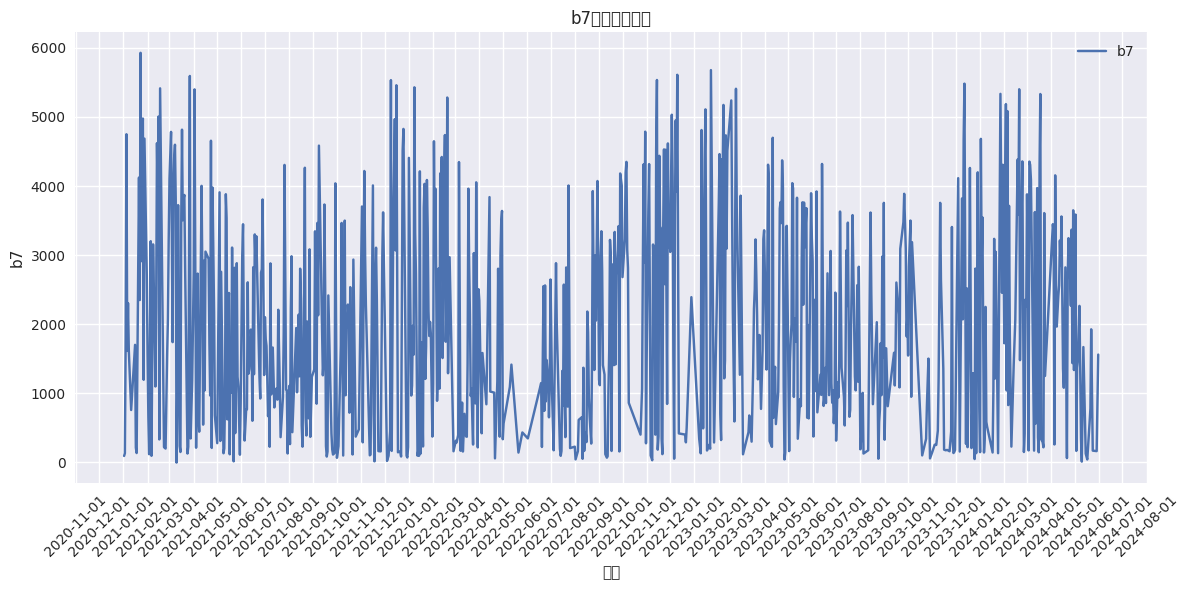

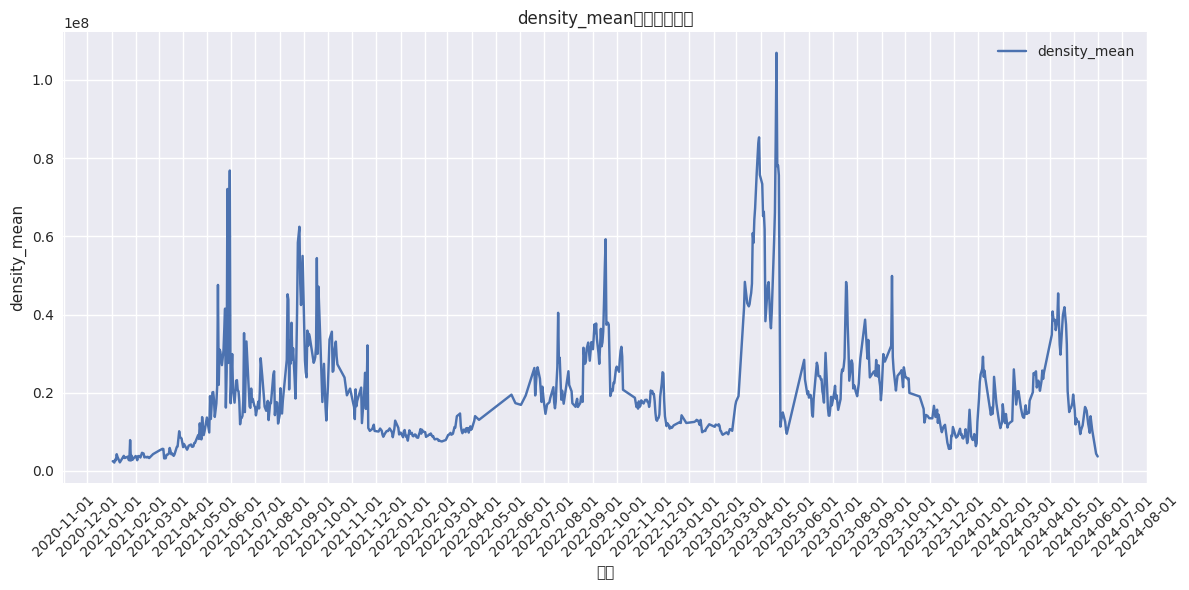

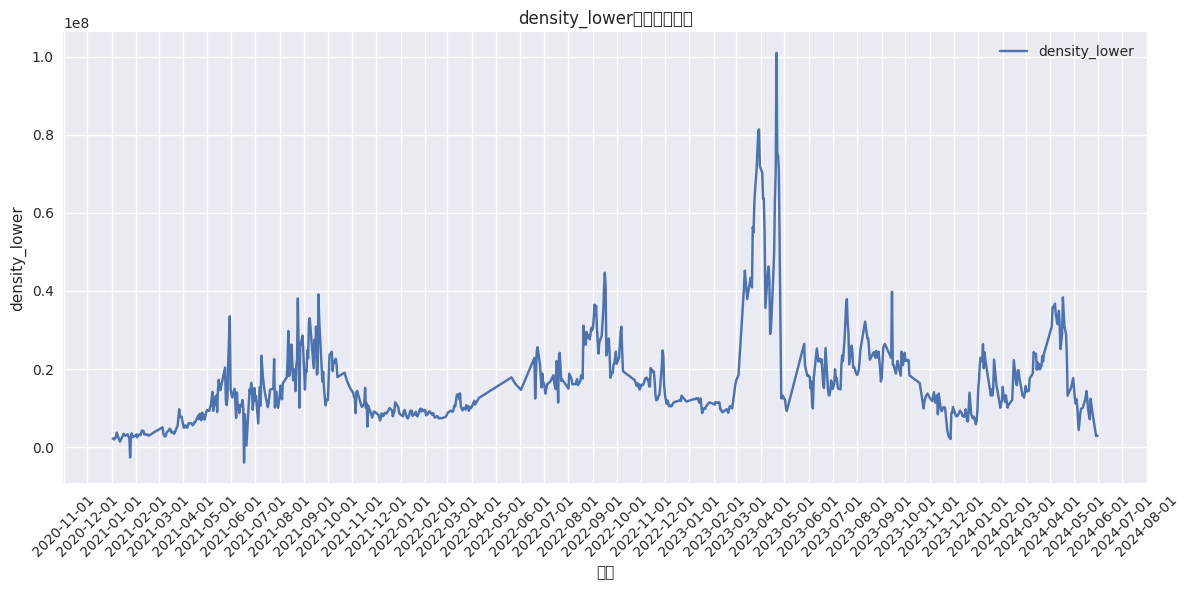

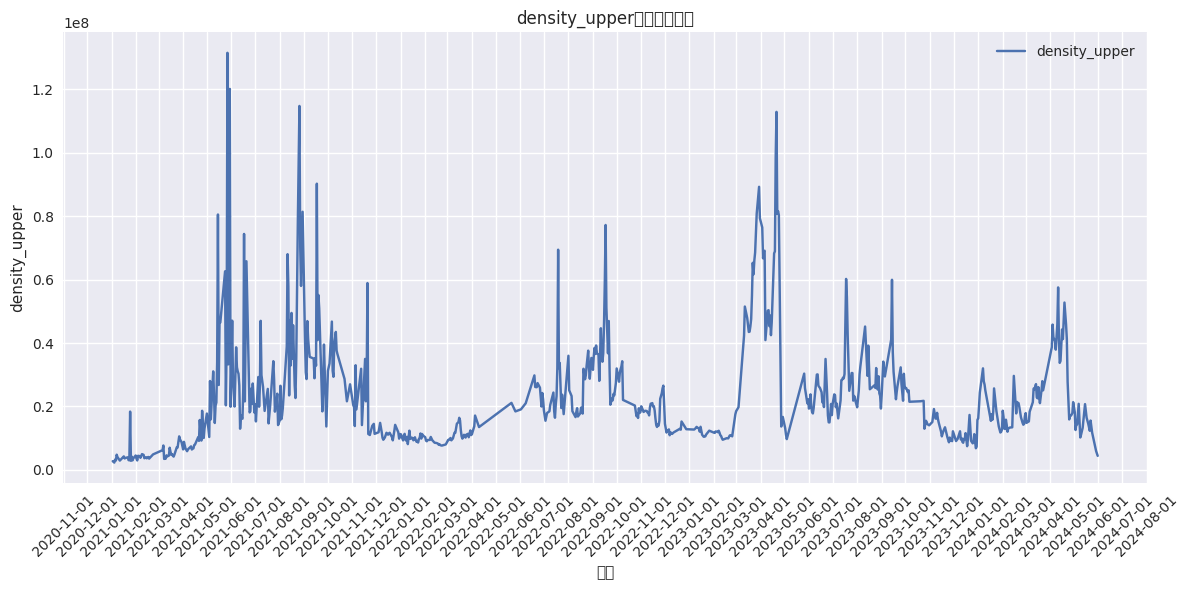

所有特征的时间序列图已生成完毕。


In [5]:

df['date'] = pd.to_datetime(df['date'])

# 获取所有特征列名
features = df.columns.drop(['date'])

# 设置图表样式
plt.style.use('seaborn')

# 为每个特征创建单独的图表
for feature in features:
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df[feature], label=feature)
    plt.title(f'{feature}随时间的变化')
    plt.xlabel('日期')
    plt.ylabel(feature)
    plt.legend()
    
    # 设置x轴日期格式
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()





print("所有特征的时间序列图已生成完毕。")

FAI指数计算完成


/tmp/ipykernel_13244/4034195514.py:31: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_13244/4034195514.py:31: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_13244/4034195514.py:31: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_13244/4034195514.py:31: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_13244/4034195514.py:31: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_13244/4034195514.py:31: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_13244/4034195514.py:31: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  plt.

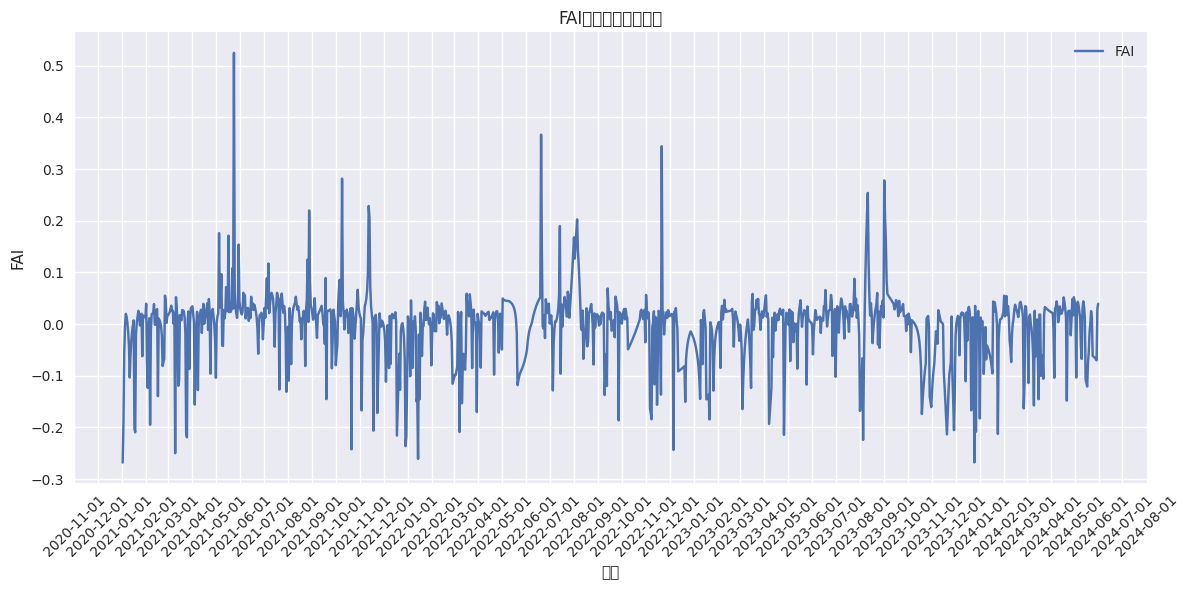

FAI指数计算公式已修正，现在FAI值应该在-1到1之间


In [6]:
# 计算FAI (Floating Algae Index)
# FAI = (Rrc.859 - R'rc.859)/(Rrc.859 + R'rc.859)
# 其中 R'rc.859 = Rrc.645 + (Rrc.1240 - Rrc.645) * (859-645)/(1240-645)

# 使用b2(859nm)、b1(645nm)和b5(1240nm)波段计算FAI
R_rc859 = df['b2']
R_rc645 = df['b1'] 
R_rc1240 = df['b5']

# 计算R'rc.859
R_rc859_prime = R_rc645 + (R_rc1240 - R_rc645) * (859-645)/(1240-645)

# 计算FAI
df['FAI'] = (R_rc859 - R_rc859_prime)/(R_rc859 + R_rc859_prime)

print("FAI指数计算完成")

# 绘制FAI时间序列图
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['FAI'], label='FAI')
plt.title('FAI指数随时间的变化')
plt.xlabel('日期')
plt.ylabel('FAI')
plt.legend()

# 设置x轴日期格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("FAI指数计算公式已修正，现在FAI值应该在-1到1之间")




In [7]:

# 将结果保存到CSV文件
df.to_csv('特征和密度结果_MODIS_MOD09GA_061_20241106_插值填充_tuoshan2.csv', index=False)
print("已补充缺失日期并将FAI指数写入CSV文件")

已补充缺失日期并将FAI指数写入CSV文件
